# MODEL EVALUATION AND VALIDATION TECHNIQUES

### Apple Stocks Dataset

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Load the Apple stock data (replace 'your_data.csv' with the actual file path)

data = pd.read_csv('apple_stocks.csv')

data.head()

,Date,Open,High,Low,Close,Volume
0,7-Jul-17,142.90,144.75,142.90,144.18,19201712
1,6-Jul-17,143.02,143.50,142.41,142.73,24128782
2,5-Jul-17,143.69,144.79,142.72,144.09,21569557
3,3-Jul-17,144.88,145.30,143.10,143.50,14277848
4,30-Jun-17,144.45,144.96,143.78,144.02,23024107


In [3]:
# Checking Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    129 non-null    object 
 1   Open    129 non-null    float64
 2   High    129 non-null    float64
 3   Low     129 non-null    float64
 4   Close   129 non-null    float64
 5   Volume  129 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 6.2+ KB


# Data Cleaning and Preprocessing

In [4]:
# 1. Convert 'Date' column to datetime format

data['Date'] = pd.to_datetime(data['Date'])

data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_18028\824130883.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


,Date,Open,High,Low,Close,Volume
0,2017-07-07,142.90,144.75,142.90,144.18,19201712
1,2017-07-06,143.02,143.50,142.41,142.73,24128782
2,2017-07-05,143.69,144.79,142.72,144.09,21569557
3,2017-07-03,144.88,145.30,143.10,143.50,14277848
4,2017-06-30,144.45,144.96,143.78,144.02,23024107


In [5]:
# 2. Handle Missing Values (if any)

data.dropna(inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    129 non-null    datetime64[ns]
 1   Open    129 non-null    float64       
 2   High    129 non-null    float64       
 3   Low     129 non-null    float64       
 4   Close   129 non-null    float64       
 5   Volume  129 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 6.2 KB


In [6]:
# 3. Feature Engineering (Example: Calculate daily returns)

data['Daily_Return'] = data['Close'].pct_change()
data.dropna(inplace=True)

In [7]:
len(data)

128

In [8]:
# 4. Normalize or Scale Numerical Features (optional but can be beneficial)

scaler = StandardScaler()
data[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return']] = scaler.fit_transform(
    data[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return']]
)


In [9]:
# 5. Define the Target Variable

data['Price_Up'] = (data['Close'].shift(-1) > data['Close']).astype(int)

In [10]:
# 6. Split the data into training and testing sets

X = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return']]
y = data['Price_Up']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Define the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter tuning

In [12]:
# Hyperparameter tuning using GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [13]:
# Best hyperparameters

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [14]:
# K-Fold Cross-Validation for model evaluation

cross_val_scores = cross_val_score(best_estimator, X_train, y_train, cv=5)
print(cross_val_scores)

[0.38095238 0.52380952 0.6        0.7        0.55      ]


In [15]:
# Train the final model

best_estimator.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [16]:
# Predictions on the test set

y_pred = best_estimator.predict(X_test)

In [17]:
# Classification report and metrics

classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [18]:
# ROC Curve and AUC
y_prob = best_estimator.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Interpretation and Practical Usage
# You can analyze feature importances, visualize results, and make predictions on new data

# Print results
print("Best Hyperparameters:", best_params)
print("Cross-Validation Scores:", cross_val_scores)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)
print("ROC AUC:", roc_auc)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Cross-Validation Scores: [0.38095238 0.52380952 0.6        0.7        0.55      ]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74        17
           1       0.50      0.44      0.47         9

    accuracy                           0.65        26
   macro avg       0.61      0.60      0.61        26
weighted avg       0.65      0.65      0.65        26

Confusion Matrix:
 [[13  4]
 [ 5  4]]
ROC AUC: 0.699346405228758


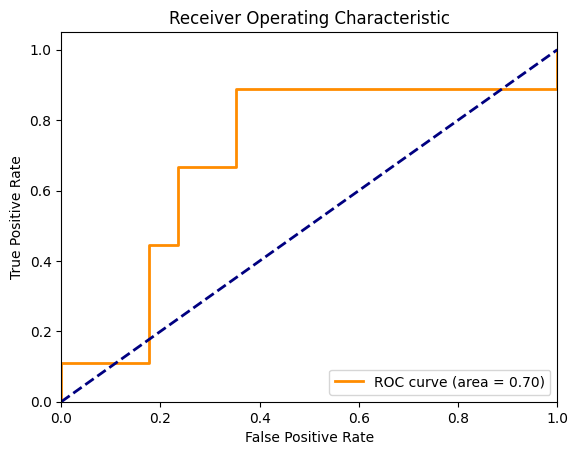

In [19]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()